In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Reshape, Dropout
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.layers import ReLU
import os,cv2
import json
import glob
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow import keras
import h5py
import matplotlib.image as img
%matplotlib inline

In [2]:
!pip install split-folders
import splitfolders
splitfolders.ratio('D:/Project/Alzheimer_ disease/dataset/', output="output", seed=1345, ratio=(.8, 0.1,0.1)) 

Copying files: 6400 files [00:05, 1162.06 files/s]


In [3]:
IMG_HEIGHT = 128
IMG_WIDTH = 128
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
'D:/Project/Alzheimer_ disease/output/train/',
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=16
)

Found 5119 files belonging to 4 classes.


In [4]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
'D:/Project/Alzheimer_ disease/output/test/',
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=32
)

Found 642 files belonging to 4 classes.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
'D:/Project/Alzheimer_ disease/output/val/',
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=32
)

Found 639 files belonging to 4 classes.


In [6]:
class_names = train_ds.class_names
print(class_names)
train_ds

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


<BatchDataset shapes: ((None, 128, 128, 3), (None,)), types: (tf.float32, tf.int32)>

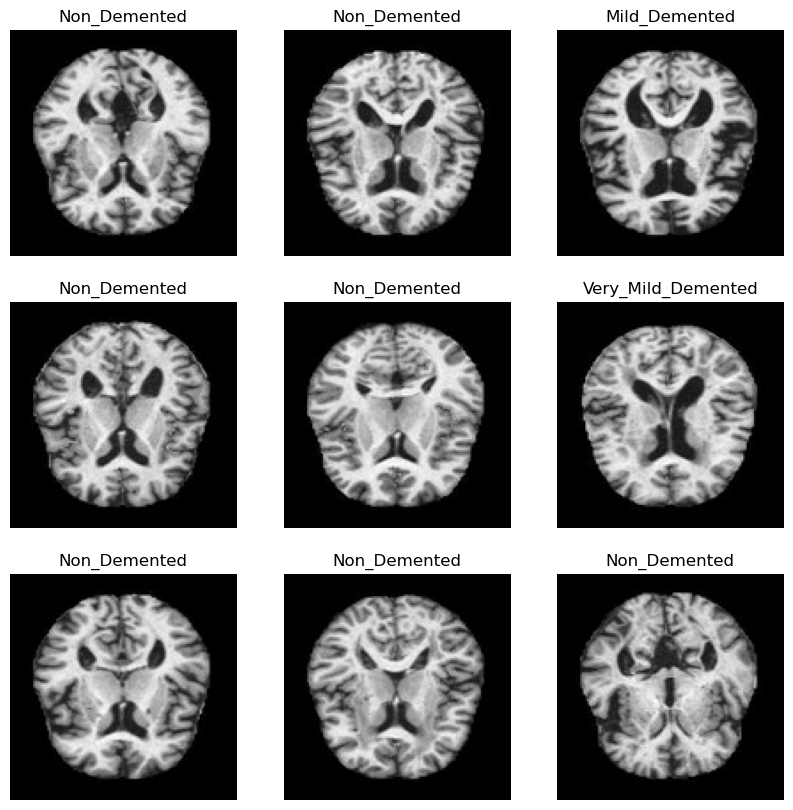

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

<function matplotlib.pyplot.show(close=None, block=None)>

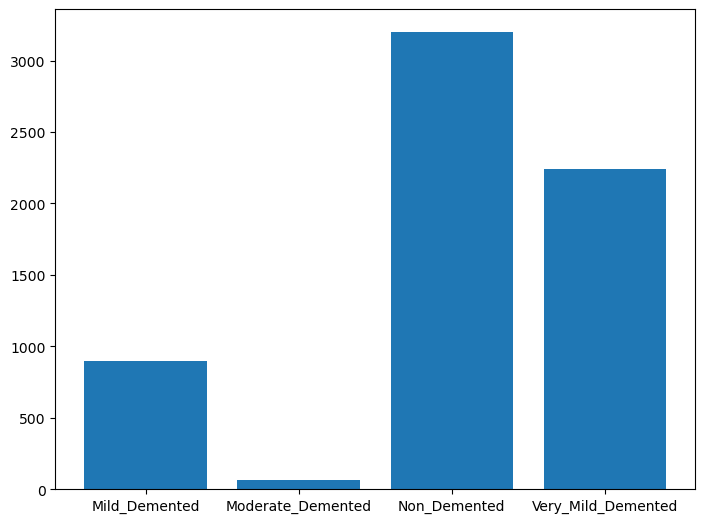

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
size = [896,64,3200,2240]
ax.bar(class_names,size)
plt.show

In [9]:
model = Sequential([
    keras.layers.Convolution2D(256, 3, activation='relu', padding='same', input_shape=(128,128,3), kernel_initializer="he_normal", strides=1),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Convolution2D(256, 3, activation='relu', padding='same', kernel_initializer="he_normal", strides=1),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Convolution2D(128, 3, activation='relu', padding='same', kernel_initializer="he_normal", strides=1),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.2),
    keras.layers.Convolution2D(64, 3, activation='relu', padding='same', kernel_initializer="he_normal", strides=1),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Convolution2D(32, 3, activation='relu', padding='same', kernel_initializer="he_normal", strides=1),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu', kernel_initializer="he_normal"),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
    ])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 256)     7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 256)       590080    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       295040    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 128)       0

In [12]:
model.compile(loss="sparse_categorical_crossentropy", optimizer = "Adam",metrics=["accuracy"])

In [15]:
hist = model.fit(train_ds,validation_data=val_ds,epochs=200, batch_size=16, verbose=1)

Epoch 1/200
160/160 [==============================] - 16s 98ms/step - loss: 1.2562 - accuracy: 0.4522 - val_loss: 1.0427 - val_accuracy: 0.5039
Epoch 2/200
160/160 [==============================] - 13s 83ms/step - loss: 1.0998 - accuracy: 0.4825 - val_loss: 1.1190 - val_accuracy: 0.3662
Epoch 3/200
160/160 [==============================] - 13s 83ms/step - loss: 1.0565 - accuracy: 0.4974 - val_loss: 1.0499 - val_accuracy: 0.5133
Epoch 4/200
160/160 [==============================] - 13s 83ms/step - loss: 1.0496 - accuracy: 0.4880 - val_loss: 1.0024 - val_accuracy: 0.5649
Epoch 5/200
160/160 [==============================] - 14s 87ms/step - loss: 1.0295 - accuracy: 0.5062 - val_loss: 0.9619 - val_accuracy: 0.5462
Epoch 6/200
160/160 [==============================] - 13s 83ms/step - loss: 1.0222 - accuracy: 0.5202 - val_loss: 0.9227 - val_accuracy: 0.6088
Epoch 7/200
160/160 [==============================] - 13s 83ms/step - loss: 0.9765 - accuracy: 0.5214 - val_loss: 0.9611 - val_ac

160/160 [==============================] - 14s 87ms/step - loss: 0.2934 - accuracy: 0.8875 - val_loss: 0.2664 - val_accuracy: 0.8983
Epoch 58/200
160/160 [==============================] - 14s 87ms/step - loss: 0.2680 - accuracy: 0.8990 - val_loss: 0.2319 - val_accuracy: 0.9077
Epoch 59/200
160/160 [==============================] - 14s 86ms/step - loss: 0.2805 - accuracy: 0.8939 - val_loss: 0.2572 - val_accuracy: 0.8920
Epoch 60/200
160/160 [==============================] - 14s 86ms/step - loss: 0.2537 - accuracy: 0.9019 - val_loss: 0.2307 - val_accuracy: 0.9124
Epoch 61/200
160/160 [==============================] - 14s 87ms/step - loss: 0.2385 - accuracy: 0.9066 - val_loss: 0.2629 - val_accuracy: 0.8936
Epoch 62/200
160/160 [==============================] - 14s 86ms/step - loss: 0.2303 - accuracy: 0.9121 - val_loss: 0.2234 - val_accuracy: 0.9124
Epoch 63/200
160/160 [==============================] - 14s 87ms/step - loss: 0.2398 - accuracy: 0.9103 - val_loss: 0.2036 - val_accuracy

160/160 [==============================] - 14s 85ms/step - loss: 0.0545 - accuracy: 0.9820 - val_loss: 0.0919 - val_accuracy: 0.9703
Epoch 114/200
160/160 [==============================] - 14s 84ms/step - loss: 0.0595 - accuracy: 0.9830 - val_loss: 0.2116 - val_accuracy: 0.9296
Epoch 115/200
160/160 [==============================] - 14s 87ms/step - loss: 0.0808 - accuracy: 0.9738 - val_loss: 0.2331 - val_accuracy: 0.9327
Epoch 116/200
160/160 [==============================] - 14s 87ms/step - loss: 0.0880 - accuracy: 0.9727 - val_loss: 0.1298 - val_accuracy: 0.9593
Epoch 117/200
160/160 [==============================] - 14s 87ms/step - loss: 0.0632 - accuracy: 0.9777 - val_loss: 0.1202 - val_accuracy: 0.9562
Epoch 118/200
160/160 [==============================] - 14s 86ms/step - loss: 0.0584 - accuracy: 0.9785 - val_loss: 0.1527 - val_accuracy: 0.9499
Epoch 119/200
160/160 [==============================] - 14s 86ms/step - loss: 0.0548 - accuracy: 0.9820 - val_loss: 0.2069 - val_ac

Epoch 169/200
160/160 [==============================] - 14s 86ms/step - loss: 0.0438 - accuracy: 0.9838 - val_loss: 0.1590 - val_accuracy: 0.9546
Epoch 170/200
160/160 [==============================] - 14s 86ms/step - loss: 0.0748 - accuracy: 0.9816 - val_loss: 0.0996 - val_accuracy: 0.9640
Epoch 171/200
160/160 [==============================] - 14s 89ms/step - loss: 0.0732 - accuracy: 0.9795 - val_loss: 0.1174 - val_accuracy: 0.9687
Epoch 172/200
160/160 [==============================] - 14s 88ms/step - loss: 0.0533 - accuracy: 0.9844 - val_loss: 0.1187 - val_accuracy: 0.9687
Epoch 173/200
160/160 [==============================] - 14s 90ms/step - loss: 0.0328 - accuracy: 0.9898 - val_loss: 0.1515 - val_accuracy: 0.9593
Epoch 174/200
160/160 [==============================] - 16s 101ms/step - loss: 0.0443 - accuracy: 0.9859 - val_loss: 0.1324 - val_accuracy: 0.9531
Epoch 175/200
160/160 [==============================] - 14s 90ms/step - loss: 0.0749 - accuracy: 0.9773 - val_loss: 

In [22]:
accuracy = hist.history['accuracy']
loss = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

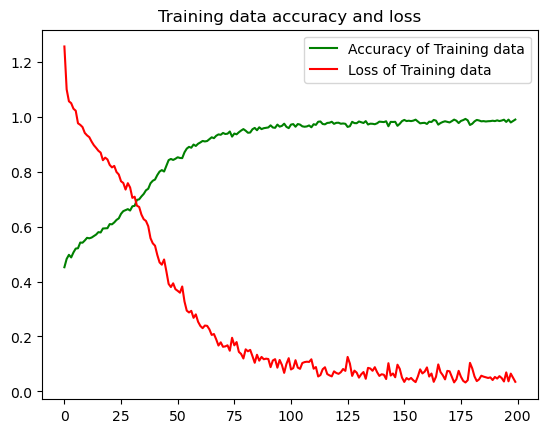

<Figure size 640x480 with 0 Axes>

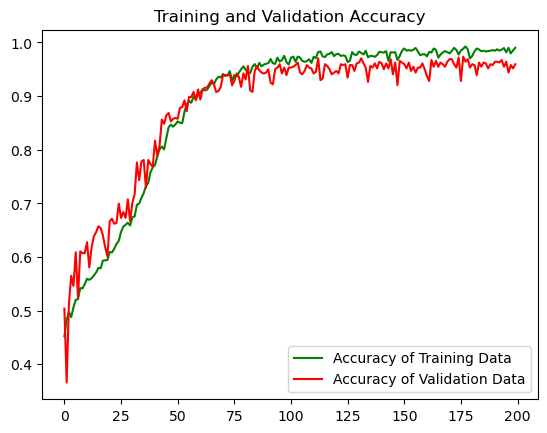

<Figure size 640x480 with 0 Axes>

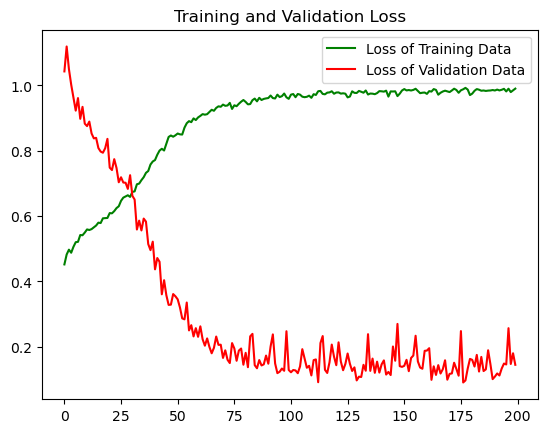

<Figure size 640x480 with 0 Axes>

In [23]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'g', label='Accuracy of Training data')
plt.plot(epochs, loss, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()
plt.show()


plt.plot(epochs, accuracy, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()


plt.plot(epochs, accuracy, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()


In [24]:
loss, accuracy = model.evaluate(test_ds)

21/21 [==============================] - 1s 48ms/step - loss: 0.0791 - accuracy: 0.9751


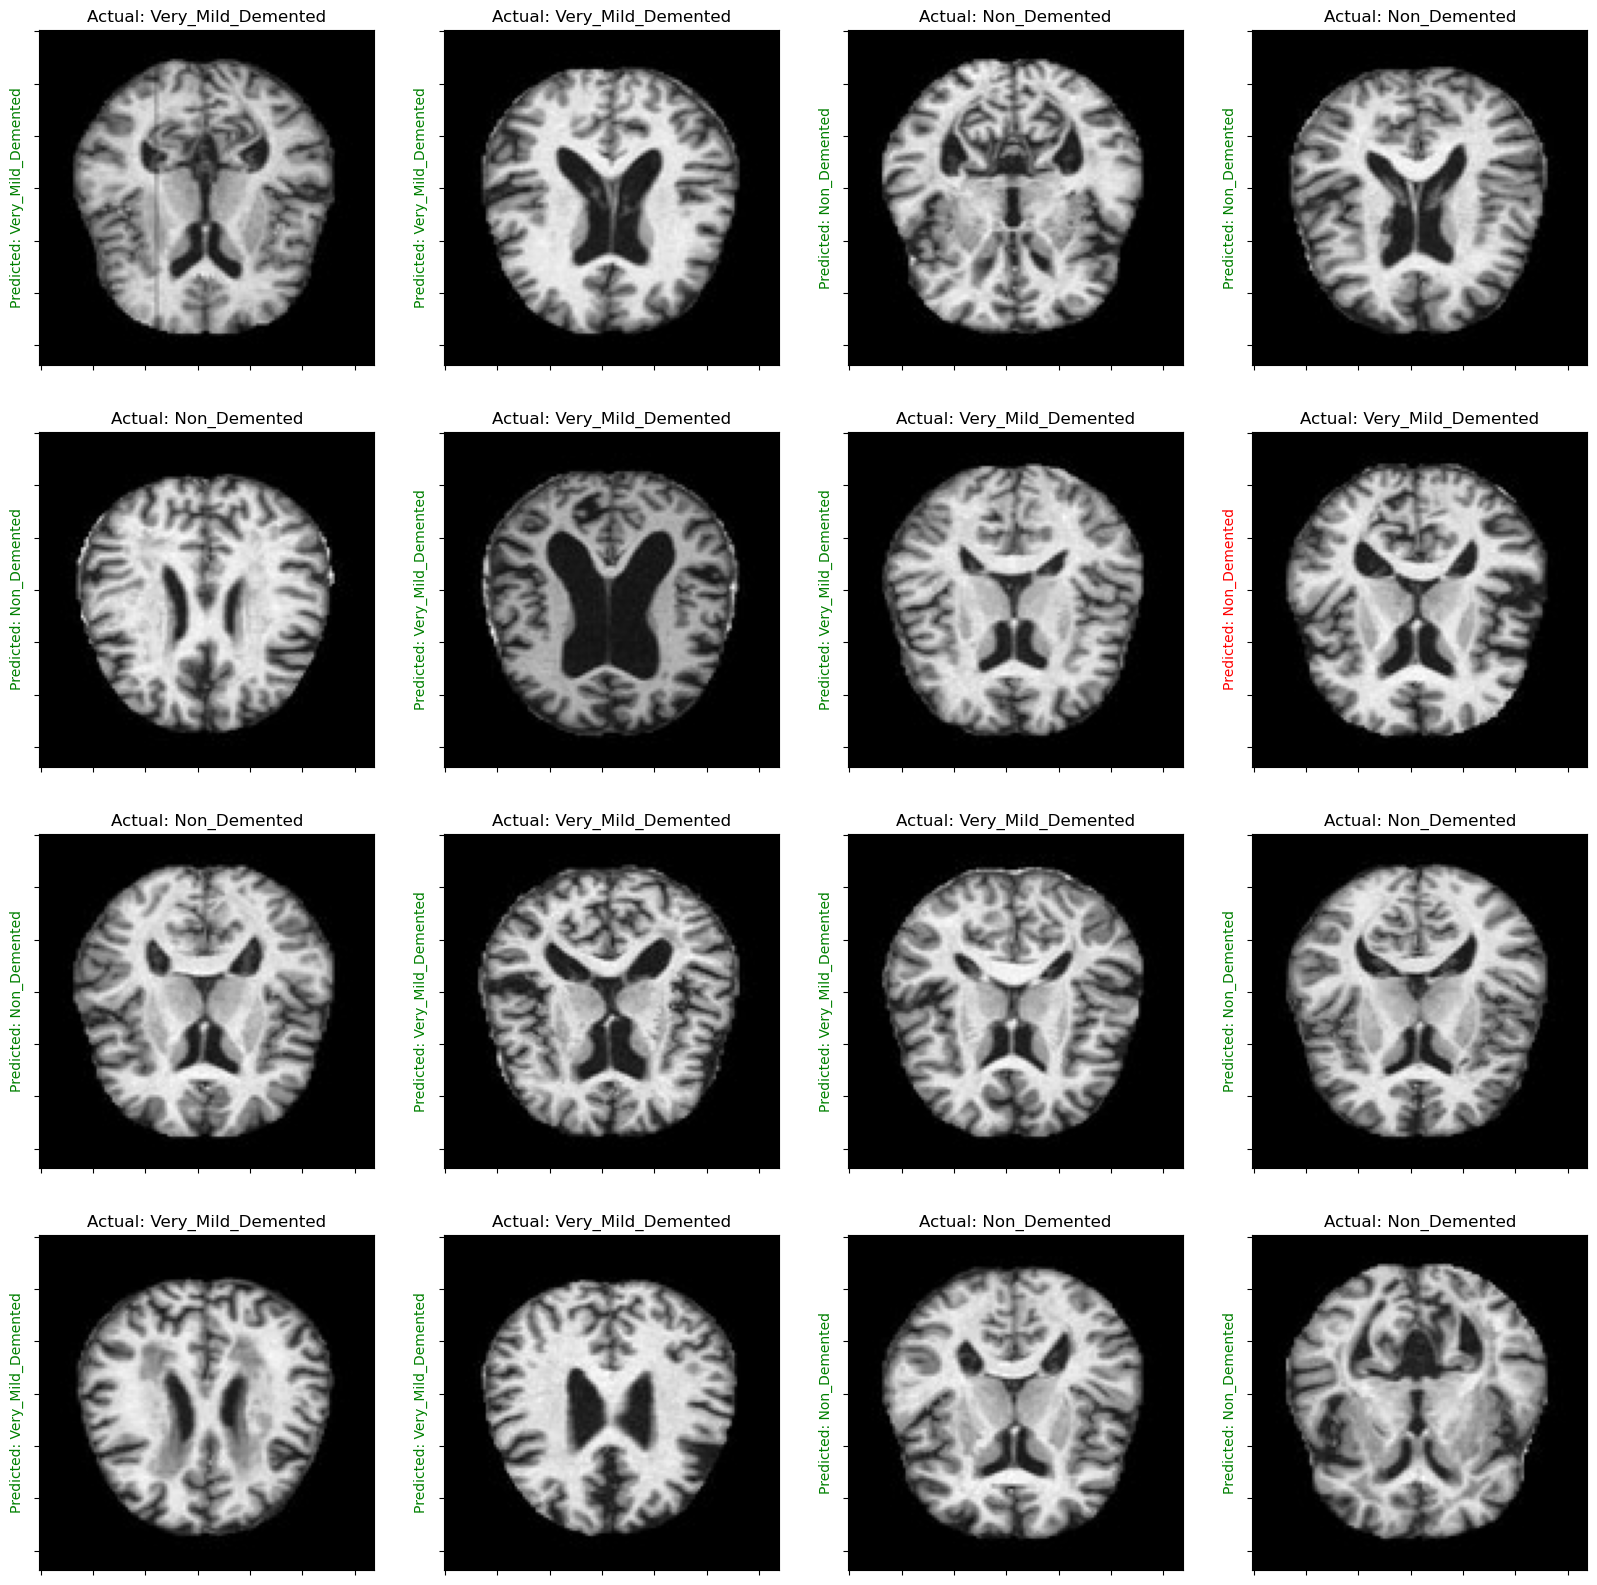

In [25]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})
            
        else:
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])